In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import os 

In [2]:
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
#Drop unnecessary columns
df=df.drop(columns=['Id'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
#Infrmation about the table 
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
#No. of samples on each class
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [13]:
#Check for null values in the columns
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

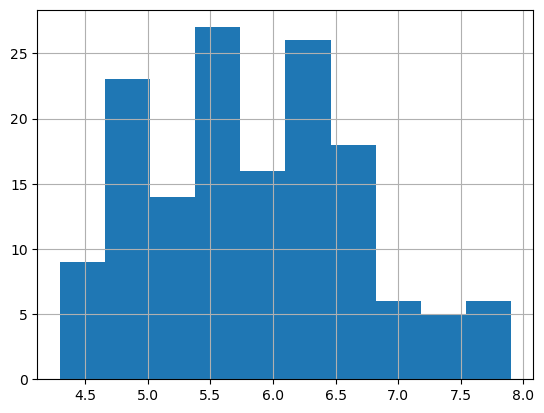

In [15]:
#Exploratory Data Analysis (EDA)
df['SepalLengthCm'].hist()

<Axes: >

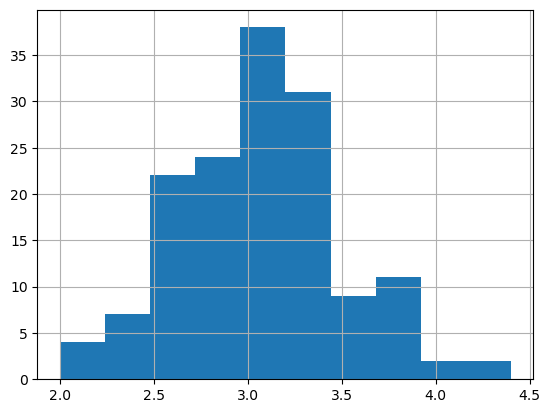

In [17]:
df['SepalWidthCm'].hist()

<Axes: >

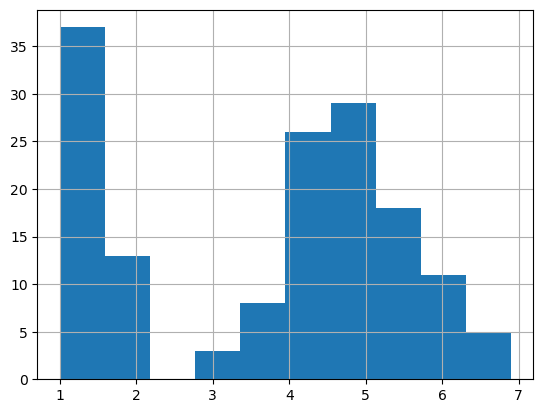

In [19]:
df['PetalLengthCm'].hist()

<Axes: >

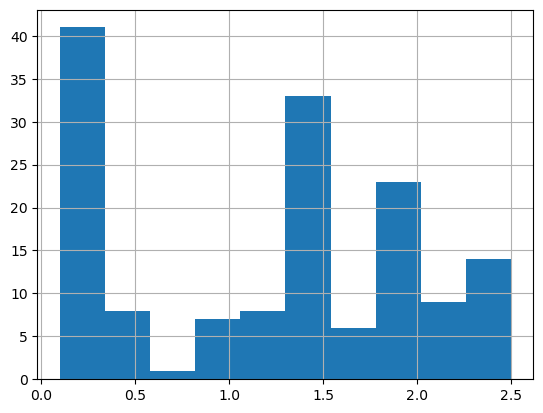

In [21]:
df['PetalWidthCm'].hist()

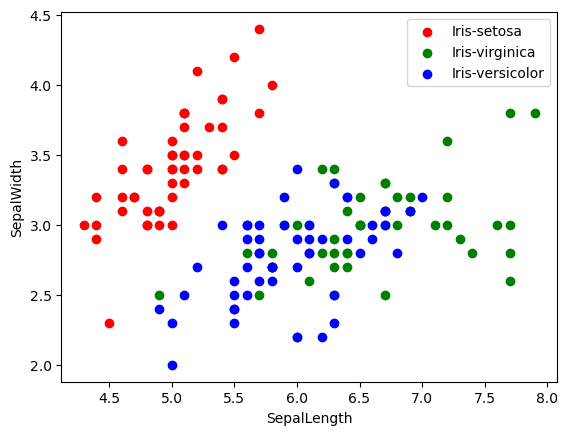

In [23]:
#Scatterplot
colors=['red','green','blue']
species=['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']

for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i], label=species[i])
    plt.xlabel('SepalLength')
    plt.ylabel('SepalWidth')
    plt.legend()

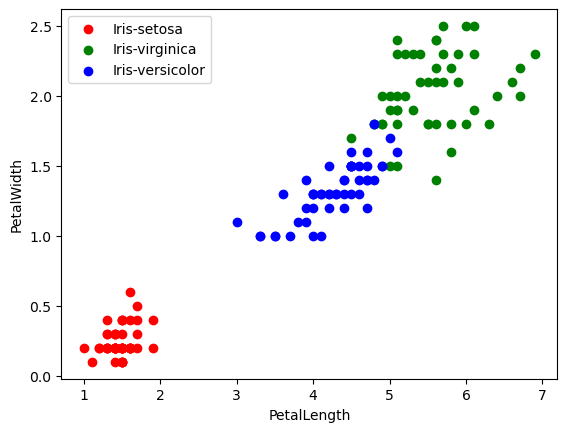

In [25]:
#Using Petal
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i], label=species[i])
    plt.xlabel('PetalLength')
    plt.ylabel('PetalWidth')
    plt.legend()

In [27]:
#Lable Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [29]:
df['Species']=le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [38]:
from sklearn.model_selection import train_test_split

#Train = 70%; Test = 30%

X=df.drop(columns=['Species'])
y=df['Species']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30, random_state=5)

In [44]:
#Build Model-Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [46]:
model.fit(X_train, y_train)

LogisticRegression()

In [50]:
#Print Metrics
print('Accuracy:',model.score(X_test,y_test)*100)

Accuracy: 97.77777777777777


In [54]:
#Using K Nearest Neighbours(KNN)
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [56]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [58]:
#Print Metrics
print('Accuracy:',model.score(X_test,y_test)*100)

Accuracy: 95.55555555555556
